# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import os

sns.set_theme(style="white")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Membaca dataset ke dalam DataFrame
df = pd.read_csv("../student_performance_raw/Student_Performance.csv")
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi dasar tentang dataset
print("\n======== Informasi Dataset ========")
df.info()


======== Informasi Dataset ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score    

In [4]:
# Menampilkan statistik deskriptif dari dataset
print("\n======== Statistik Deskriptif ========")
df.describe(include='all')


======== Statistik Deskriptif ========


,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
count,25000.00000,25000.000000,25000,25000,25000,25000.000000,25000.000000,25000,25000,25000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000
unique,NaN,NaN,3,2,6,NaN,NaN,2,4,2,6,NaN,NaN,NaN,NaN,6
top,NaN,NaN,other,private,diploma,NaN,NaN,yes,15-30 min,yes,mixed,NaN,NaN,NaN,NaN,d
freq,NaN,NaN,8463,12725,4314,NaN,NaN,21227,6362,12500,4341,NaN,NaN,NaN,NaN,6311
mean,7493.04380,16.482760,NaN,NaN,NaN,4.253224,75.084084,NaN,NaN,NaN,NaN,63.785944,63.745320,63.681948,64.006172,NaN
std,4323.56215,1.703895,NaN,NaN,NaN,2.167541,14.373171,NaN,NaN,NaN,NaN,20.875262,20.970529,20.792693,18.932025,NaN
min,1.00000,14.000000,NaN,NaN,NaN,0.500000,50.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,14.500000,NaN
25%,3743.75000,15.000000,NaN,NaN,NaN,2.400000,62.800000,NaN,NaN,NaN,NaN,48.300000,48.200000,48.300000,49.000000,NaN
50%,7461.50000,16.000000,NaN,NaN,NaN,4.300000,75.100000,NaN,NaN,NaN,NaN,64.100000,64.100000,64.200000,64.200000,NaN
75%,11252.00000,18.000000,NaN,NaN,NaN,6.100000,87.500000,NaN,NaN,NaN,NaN,80.000000,80.000000,80.000000,79.000000,NaN


In [5]:
# Mengecek nilai yang hilang dalam dataset
print("\n======== Nilai yang Hilang ========")
print(df.isnull().sum())
print(f"\nBanyak Missing Value: {df.isnull().sum().sum()}")


======== Nilai yang Hilang ========
student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

Banyak Missing Value: 0


In [6]:
# Mengecek data duplikat
print("\n======== Data Duplikat ========")
duplicate_count = df.duplicated().sum()
print(f"\nJumlah Data Duplikat: {duplicate_count}")


======== Data Duplikat ========

Jumlah Data Duplikat: 10000


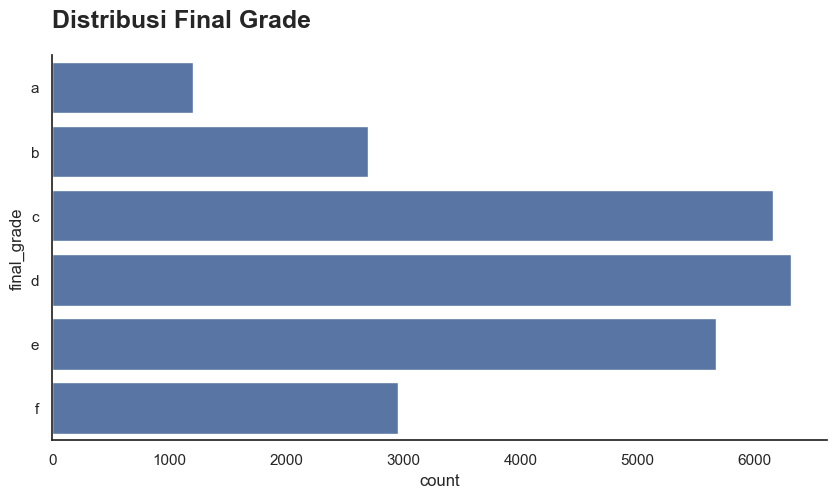

In [7]:
# Distribusi Target (Final Grade)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='final_grade', order=sorted(df['final_grade'].unique()))
plt.title('Distribusi Final Grade', loc='left', fontsize=18, weight="bold", pad=20)
sns.despine()
plt.show()

**💡Insight:**  
Distribusi final grade menunjukkan mayoritas siswa berada pada **grade menengah**, dengan **grade D dan C sebagai kategori terbanyak**. Grade **E** juga cukup signifikan, menandakan sebagian siswa mendekati performa rendah. Sebaliknya, **grade A paling sedikit**, sehingga hanya sebagian kecil siswa mencapai performa sangat tinggi. Secara keseluruhan, performa akademik siswa terkonsentrasi pada level menengah, bukan pada nilai ekstrem.

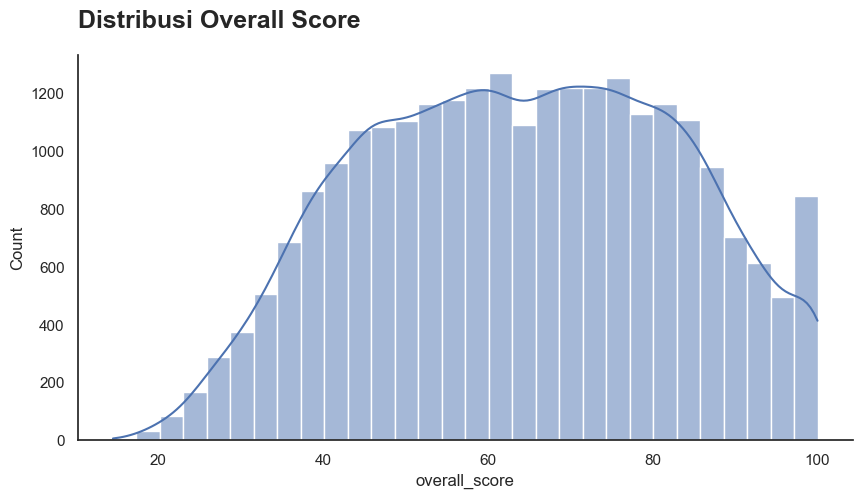

In [8]:
# Distribusi Overall Score
plt.figure(figsize=(10, 5))
sns.histplot(df['overall_score'], kde=True, bins=30)
plt.title('Distribusi Overall Score', loc='left', fontsize=18, weight="bold", pad=20)
sns.despine()
plt.show()

**💡Insight:**  
Distribusi overall score membentuk pola menyerupai distribusi normal dengan konsentrasi nilai pada rentang **menengah (sekitar 50–80)**. Nilai sangat rendah dan sangat tinggi relatif lebih sedikit, menunjukkan bahwa mayoritas siswa memiliki performa akademik yang cukup konsisten tanpa dominasi skor ekstrem.

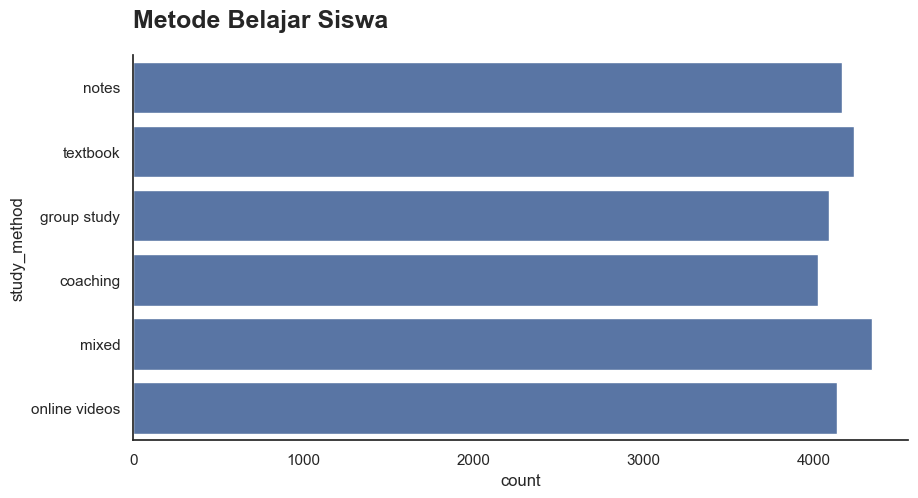

In [9]:
# 3. Distribusi Study Method
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='study_method')
plt.title('Metode Belajar Siswa', loc='left', fontsize=18, weight="bold", pad=20)
sns.despine()
plt.show()

**💡Insight:**  
Distribusi metode belajar siswa relatif **merata** di seluruh kategori, tanpa satu metode yang sangat mendominasi. Hal ini menunjukkan bahwa siswa menggunakan **beragam strategi belajar**, sehingga metode belajar berpotensi menjadi faktor pembeda performa ketika dianalisis lebih lanjut terhadap overall score atau final grade.

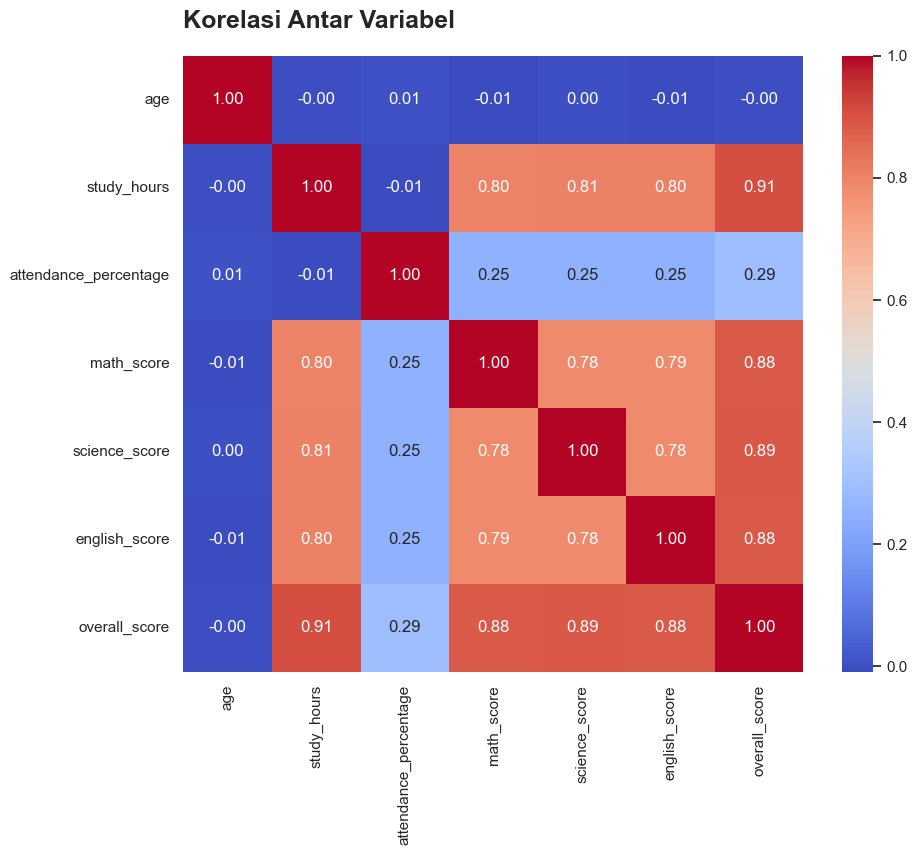

In [10]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'student_id']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel', loc='left', fontsize=18, weight="bold", pad=20)
plt.show()

**💡Insight:**  
Overall score memiliki korelasi **kuat** dengan skor mata pelajaran (Math, Science, dan English) serta **study hours**, menunjukkan bahwa performa akademik sangat dipengaruhi oleh konsistensi belajar dan capaian di tiap mata pelajaran. Sebaliknya, **age** hampir tidak berkorelasi dengan variabel lain, sementara **attendance percentage** hanya menunjukkan korelasi **lemah hingga sedang** terhadap skor akademik.

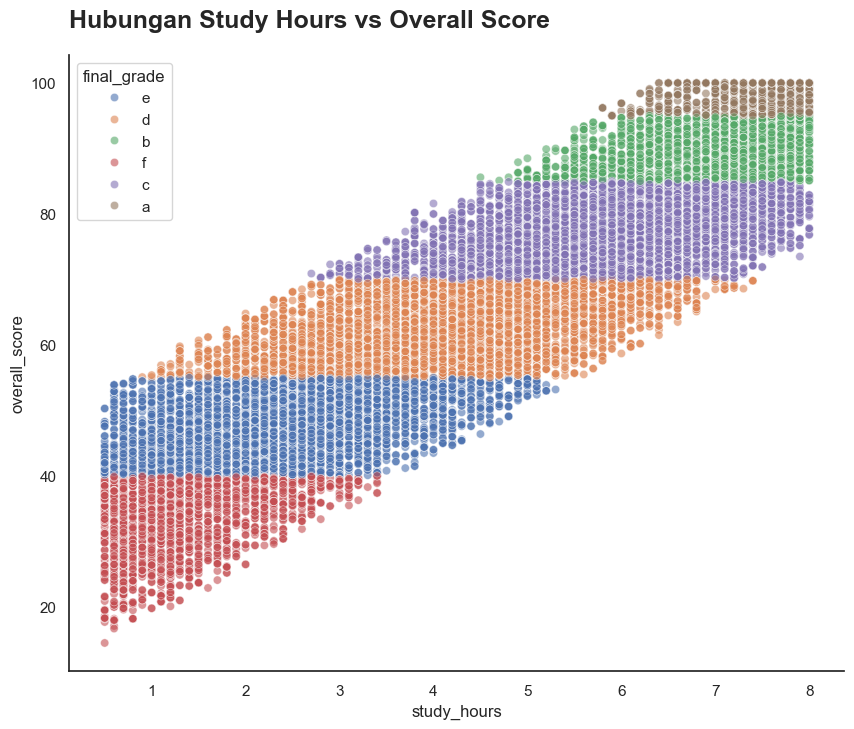

In [11]:
# Hubungan Study Hours vs Overall Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='study_hours', y='overall_score', hue='final_grade', alpha=0.6)
plt.title('Hubungan Study Hours vs Overall Score', loc='left', fontsize=18, weight="bold", pad=20)
sns.despine()
plt.show()

**💡Insight:**  
Terdapat hubungan **positif yang jelas** antara study hours dan overall score, di mana peningkatan jam belajar cenderung diikuti oleh kenaikan skor keseluruhan. Siswa dengan jam belajar rendah lebih banyak berada pada grade rendah, sedangkan grade tinggi (A–B) semakin dominan pada jam belajar yang lebih tinggi, menunjukkan bahwa durasi belajar berperan penting dalam peningkatan performa akademik.

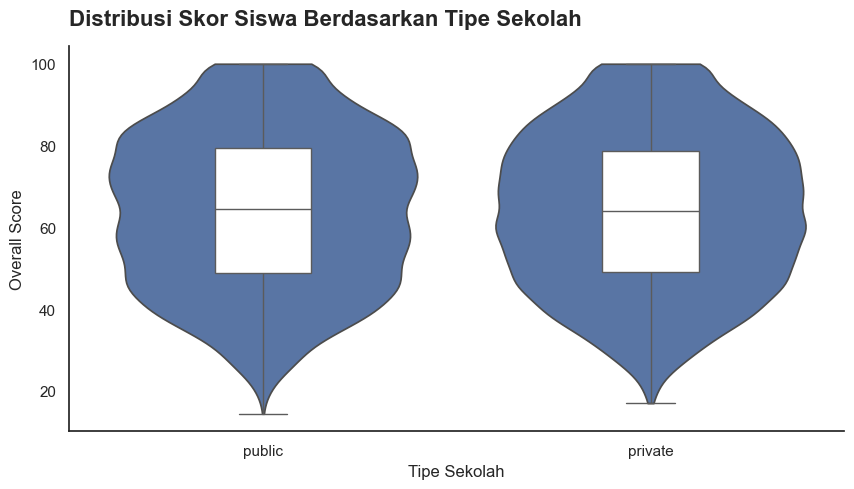

In [12]:
# Perbandingan Nilai berdasarkan Tipe Sekolah
plt.figure(figsize=(10, 5))

sns.violinplot(
    data=df,
    x="school_type",
    y="overall_score",
    inner=None,
    cut=0
)

sns.boxplot(
    data=df,
    x="school_type",
    y="overall_score",
    width=0.25,
    showfliers=False,
    boxprops={"facecolor": "white"}
)

plt.title(
    "Distribusi Skor Siswa Berdasarkan Tipe Sekolah",
    loc="left",
    fontsize=16,
    weight="bold",
    pad=15
)

plt.xlabel("Tipe Sekolah")
plt.ylabel("Overall Score")
sns.despine()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
# Copy dataframe untuk pembersihan data
df_clean = df.copy()

# Menampilkan ukuran data awal
print(f"Ukuran Data Awal: {df_clean.shape}")

Ukuran Data Awal: (25000, 16)


In [14]:
# Menghapus duplikasi data
df_clean = df.drop_duplicates()
duplicate_count = df.duplicated().sum()
print(f"Banyak Data Duplikat yang Dihapus: {duplicate_count}")
print(f"Ukuran Data Setelah Menghapus Duplikasi: {df_clean.shape}")

Banyak Data Duplikat yang Dihapus: 10000
Ukuran Data Setelah Menghapus Duplikasi: (15000, 16)


In [15]:
# Menghapus kolom student_id karena tidak relevan untuk analisis
if 'student_id' in df_clean.columns: 
    df_clean = df_clean.drop(columns=['student_id'])

df_clean.head()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [16]:
# Normalisasi semua kolom kategorikal
for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = (
        df_clean[col]
        .str.strip()
        .str.lower()
    )

df_clean.head()

,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [17]:
# Split Data
X = df_clean.drop(columns=['final_grade', 'overall_score'])
y = df_clean['final_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Encoding variabel kategorikal
X_train_en = X_train.copy()
X_test_en = X_test.copy()
y_train_en = y_train.copy()
y_test_en = y_test.copy()

# Ordinal Encoding
ordinal_cols = ['parent_education', 'travel_time']

ordinal_categories = [
    ['no formal', 'primary', 'high school', 'diploma',
     'graduate', 'post graduate', 'phd'],
    ['<15 min', '15-30 min', '30-60 min', '>60 min'],
]

ord_enc = OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1)

X_train_en[ordinal_cols] = ord_enc.fit_transform(X_train_en[ordinal_cols])
X_test_en[ordinal_cols] = ord_enc.transform(X_test_en[ordinal_cols])

# Nominal Encoding
nominal_cols = [
    'gender',
    'school_type',
    'internet_access',
    'extra_activities',
    'study_method'
]

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=int)

ohe.fit(X_train_en[nominal_cols])

def apply_ohe(data_df, encoder, cols):
    encoded_data = encoder.transform(data_df[cols])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols), index=data_df.index)
    # Gabungkan dan hapus kolom asli
    return pd.concat([data_df.drop(columns=cols), encoded_df], axis=1)

X_train_en = apply_ohe(X_train_en, ohe, nominal_cols)
X_test_en = apply_ohe(X_test_en, ohe, nominal_cols)

# Encoding Target
le_y = LabelEncoder()
y_train_en = le_y.fit_transform(y_train_en)
y_test_en = le_y.transform(y_test_en)

# Menampilkan data latih setelah encoding
X_train_en.head(), y_train_en[:5]

(       age  parent_education  study_hours  attendance_percentage  travel_time  \
 6956    15               0.0          1.1                   74.8          3.0   
 12131   19               3.0          7.5                   69.4          2.0   
 3042    15               4.0          1.0                   67.1          3.0   
 2865    14               4.0          6.5                   97.7          0.0   
 10435   14               5.0          7.9                   67.1          0.0   
 
        math_score  science_score  english_score  gender_female  gender_male  \
 6956         33.4           34.5           52.0              1            0   
 12131       100.0           79.8          100.0              0            0   
 3042         34.0           27.9           34.8              0            1   
 2865         88.1           91.3           90.9              0            1   
 10435        72.7           81.2           91.3              0            0   
 
        ...  internet_ac

In [19]:
# Outlier Handling
X_train_oh = X_train_en.copy()
X_test_oh = X_test_en.copy()

for col in ['study_hours', 'attendance_percentage']:
    if col in X_train_oh.columns:
        Q1 = X_train_oh[col].quantile(0.25)
        Q3 = X_train_oh[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

        X_train_oh[col] = X_train_oh[col].clip(lower, upper)
        X_test_oh[col] = X_test_oh[col].clip(lower, upper)

# Menampilkan hasil penanganan outlier
X_train_oh.describe(), X_test_oh.describe()

(                age  parent_education   study_hours  attendance_percentage  \
 count  12000.000000      12000.000000  12000.000000           12000.000000   
 mean      16.476083          3.338917      4.256792              75.005417   
 std        1.703184          1.950906      2.170022              14.376394   
 min       14.000000          0.000000      0.500000              50.000000   
 25%       15.000000          2.000000      2.400000              62.500000   
 50%       16.000000          3.000000      4.300000              75.000000   
 75%       18.000000          5.000000      6.100000              87.400000   
 max       19.000000          6.000000      8.000000             100.000000   
 
         travel_time    math_score  science_score  english_score  \
 count  12000.000000  12000.000000   12000.000000   12000.000000   
 mean       1.507750     63.751842      63.711492      63.687717   
 std        1.109824     20.957172      21.044468      20.902049   
 min        0.0

In [20]:
# Scaling
X_train_scaled = X_train_oh.copy()
X_test_scaled = X_test_oh.copy()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Mengembalikan ke Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_oh.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_oh.columns)

X_train_scaled.head()

,age,parent_education,study_hours,attendance_percentage,travel_time,math_score,science_score,english_score,gender_female,gender_male,...,internet_access_no,internet_access_yes,extra_activities_no,extra_activities_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_notes,study_method_online videos,study_method_textbook
0,-0.866697,-1.711541,-1.454788,-0.014289,1.344639,-1.448340,-1.388142,-0.559189,1.413418,-0.705914,...,2.371185,-2.371185,-0.999000,0.999000,2.287035,-0.441028,-0.455107,-0.454973,-0.444662,-0.450162
1,1.481943,-0.173730,1.494613,-0.389920,0.443557,1.729702,0.764532,1.737332,-0.707505,-0.705914,...,-0.421730,0.421730,-0.999000,0.999000,-0.437247,2.267432,-0.455107,-0.454973,-0.444662,-0.450162
2,-0.866697,0.338874,-1.500873,-0.549912,1.344639,-1.419709,-1.701777,-1.382109,-0.707505,1.416603,...,-0.421730,0.421730,1.001001,-1.001001,-0.437247,-0.441028,-0.455107,-0.454973,-0.444662,2.221423
3,-1.453857,0.338874,1.033769,1.578666,-1.358605,1.161854,1.311017,1.301950,-0.707505,1.416603,...,-0.421730,0.421730,-0.999000,0.999000,2.287035,-0.441028,-0.455107,-0.454973,-0.444662,-0.450162
4,-1.453857,0.851477,1.678951,-0.549912,-1.358605,0.426991,0.831061,1.321087,-0.707505,-0.705914,...,-0.421730,0.421730,-0.999000,0.999000,-0.437247,-0.441028,-0.455107,2.197932,-0.444662,-0.450162


In [21]:
# Menyimpan Hasil Preprocessing
train_final = pd.concat([X_train_scaled, pd.Series(y_train_en, name='final_grade')], axis=1)
test_final = pd.concat([X_test_scaled, pd.Series(y_test_en, name='final_grade')], axis=1)

output_dir = 'student_performance_preprocessing'
os.makedirs(output_dir, exist_ok=True)
train_final.to_csv(f"{output_dir}/train.csv", index=False)
test_final.to_csv(f"{output_dir}/test.csv", index=False)

print("Preprocessing Selesai!")
print(f"Ukuran Data Train: {train_final.shape}")
print(f"Ukuran Data Test: {test_final.shape}")

Preprocessing Selesai!
Ukuran Data Train: (12000, 24)
Ukuran Data Test: (3000, 24)
